# LeWagon - Projectweek

>About: \
This notebook is a basic introduction to our final project at LeWagon. Lets work together and make this thing work. Bitcoin to the moon :D
My idea is to design a chart-pattern based indicator for cryptocurrency trading. The model should predict price movements in the next four hours and return a possibility of being correct -> Should we optimize for Precision? The intuition of the model lies in the idea that fundamental trading behaviour can be observed in financial data and that traders and investors alike act according to specific trading signs - to such an extend, so that predictions can fulfill itself. The model is meant to be used in accordance with other indicators and only help to create a clearer picture of the market situation.

## 🔮 Cryptotrading indicator 🔮

- Build a tool that can **predict price movements** in Bitcoin in the next **four hours** using **LSTM**. 
    - 💡 Remember:

![quote](https://www.lacan.upc.edu/admoreWeb/wp-content/uploads/2018/04/test2.jpg)

## Data & Strategy 👨‍💻

- Financial Data on Bitcoin is widely available. Sources may include: 
    - Yahoo Finance (historic data)
    - https://www.cryptodatadownload.com/ (historic data)
    - https://www.theblockcrypto.com/ (on-chain analysis)
    - https://whale-alert.io/ (on-chain analysis)
    - https://www.coingecko.com/en/api (live data)
    
    
- Lets only use **free** data for now.
<br/><br/>
- **GOAL:** Prediction of the price, based on both price and a list of features.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
#Yahoo Finance Data
data = pd.read_csv("../raw_data/BTC-USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [48]:
data["Date"] = pd.to_datetime(data["Date"], format='%Y-%m-%d')

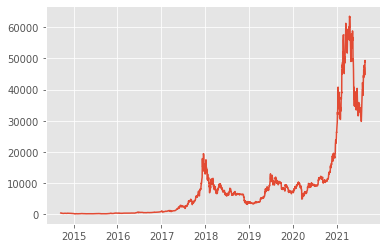

In [49]:
plt.plot(data["Date"], data["Close"])

### interactive plot
> We can later create something like this if we feel like it.

In [50]:
!pip install plotly

In [51]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2526,2021-08-17,45936.457031,47139.570313,44512.417969,44695.359375,44695.359375,3.345136e+10
2527,2021-08-18,44686.750000,45952.062500,44364.027344,44801.187500,44801.187500,3.219412e+10
2528,2021-08-19,44741.882813,46970.761719,43998.316406,46717.578125,46717.578125,3.720431e+10
2529,2021-08-20,46723.121094,49342.152344,46650.707031,49339.175781,49339.175781,3.470687e+10


In [52]:
!pip install mpl_finance

In [53]:
data = data[-60:]

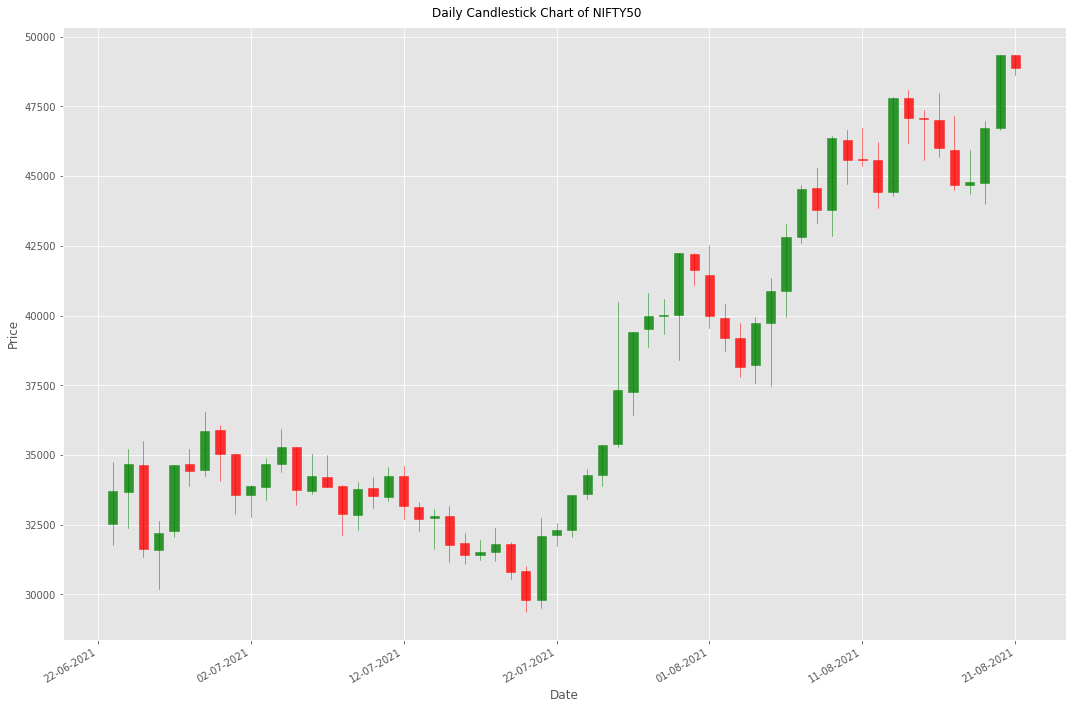

In [54]:
# python_candlestick_chart.py

import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpl_dates

plt.style.use('ggplot')

# Extracting Data for plotting
#data = pd.read_csv('candlestick_python_data.csv')
ohlc = data.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots(figsize=(15,10))

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of NIFTY50')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()

In [55]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])
fig.update_layout(yaxis=dict(
       autorange = True,
       fixedrange= False
   ))

fig.show()

## Coingecko API
<img src="https://landing.coingecko.com/wp-content/uploads/2020/03/CoinGecko-1536x480.png" width="900" height="300"/>

In [56]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

### Daily Data 🕛

- We have access to price data, market_caps and volumes on the daily and hourly time frame
- Open, High, Low, Close (OHLC) for 4h charts
<br/><br/>
- **Live data is important to keep the indicator updated all the time**

In [57]:
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=max"
response = requests.get(url).json()

response.keys()
#response

dict_keys(['prices', 'market_caps', 'total_volumes'])

In [58]:
prices = response['prices']
market_caps = response['market_caps']
total_volumes = response['total_volumes']

In [59]:
#Number of datapoints
len(market_caps)

3040

In [60]:
#timestamp = unix timestamp
unix_time = [x[0] for x in prices]
prices = [round(x[1],1) for x in prices]
#market_caps = [round(x[1] / 1000000,1) for x in market_caps] #divide by 1mill
#total_volumes = [round(x[1] / 1000000,1) for x in total_volumes] #divide by 1mill
market_caps = [x[1] for x in market_caps]
total_volumes = [x[1] for x in total_volumes]

In [61]:
daily = pd.DataFrame(unix_time,columns=['unix_time'])
daily['prices'] = pd.DataFrame(prices)
daily['market_caps'] = pd.DataFrame(market_caps)
daily['total_volumes'] = pd.DataFrame(total_volumes)
daily["Date"] = pd.to_datetime(daily["unix_time"], unit='ms').dt.date #convert unix date to datetime while removing the hour-timestamp
daily["Date"] = pd.to_datetime(daily["Date"])
daily_clean = daily.drop(columns='unix_time').set_index('Date')
daily_clean['log_price'] = daily_clean.prices.apply(lambda x: np.log(x))

In [62]:
print("after some processing...")
daily_clean.tail(5)

after some processing...


,prices,market_caps,total_volumes,log_price
Date,,,,
2021-08-21,49195.9,9.230134e+11,3.649709e+10,10.803566
2021-08-22,48933.7,9.207502e+11,4.214773e+10,10.798222
2021-08-23,49250.5,9.256301e+11,2.711018e+10,10.804675
2021-08-24,49518.6,9.307292e+11,3.580026e+10,10.810104
2021-08-25,48113.8,9.030765e+11,3.403169e+10,10.781324


💡 **Conversion into logs will play a major role** 💡

**"**```For forecasting and economic analysis many variables are used in logarithms (logs). In time series analysis this transformation is often considered to **stabilize the variance of a series**.``` **"**

- [The Role of log Transformation in Forecasting Economic Variables](https://cadmus.eui.eu/handle/1814/11150)

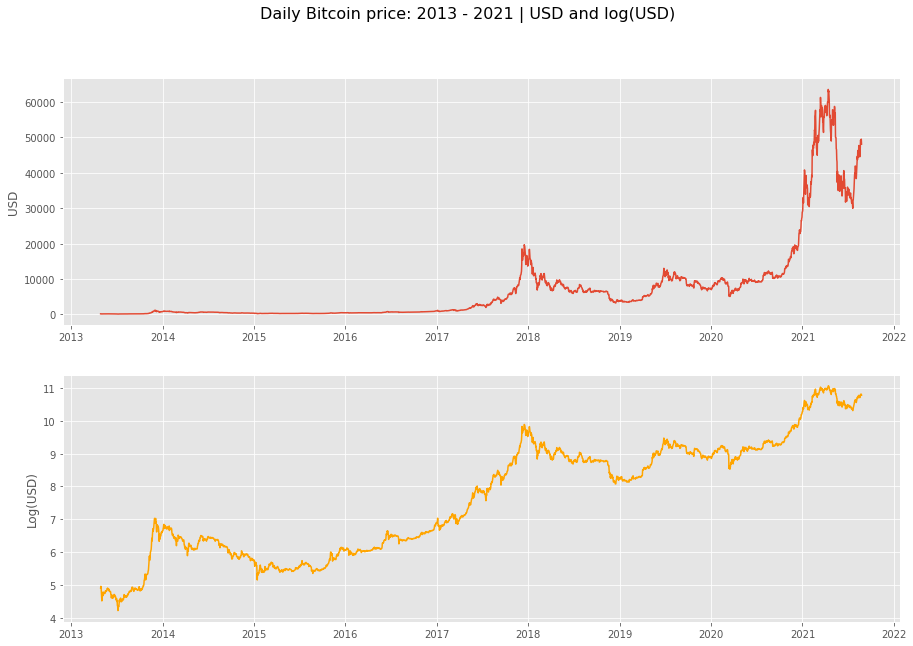

In [63]:
fig, axs = plt.subplots(2,1, figsize=(15,10))
fig.suptitle("Daily Bitcoin price: 2013 - 2021 | USD and log(USD)", size=16)
axs[0].plot(daily_clean.prices)
axs[0].set_ylabel("USD")
axs[1].plot(daily_clean.log_price, color = "orange")
axs[1].set_ylabel("Log(USD)")
plt.show()

### TARGET: 4-Hourly Data 🕓

In [64]:
url = "https://api.coingecko.com/api/v3/coins/bitcoin/ohlc?vs_currency=usd&days=30"

response = requests.get(url).json()
response

[[1627329600000, 38641.07, 39841.37, 38641.07, 39841.37],
 [1627344000000, 39580.48, 39580.48, 37230.72, 37413.74],
 [1627358400000, 37226.65, 37385.81, 36547.98, 36547.98],
 [1627372800000, 36890.36, 37179.9, 36890.36, 36982.81],
 [1627387200000, 36973.09, 37806.6, 36973.09, 37806.6],
 [1627401600000, 38146.78, 38693.71, 38146.78, 38147.61],
 [1627416000000, 38195.58, 38195.58, 37691.22, 38001.27],
 [1627430400000, 38056.91, 39265.54, 38056.91, 39265.54],
 [1627444800000, 39076.59, 39891.52, 39076.59, 39891.52],
 [1627459200000, 39731.45, 40065.84, 39377.93, 39377.93],
 [1627473600000, 39927.01, 40192.36, 39512.86, 40192.36],
 [1627488000000, 40780.78, 40780.78, 39493.7, 39493.7],
 [1627502400000, 39756.46, 40840.14, 38457.4, 40840.14],
 [1627516800000, 40410.51, 40410.51, 39752.0, 39752.0],
 [1627531200000, 40031.2, 40031.2, 39692.15, 39901.78],
 [1627545600000, 39680.28, 40173.84, 39680.28, 40031.83],
 [1627560000000, 40000.82, 40616.61, 40000.82, 40116.35],
 [1627574400000, 39659.5

In [65]:
df_4h = pd.DataFrame(response, columns = ['unix_time','open', 'high', 'low', 'close'])
df_4h["Date"] = pd.to_datetime(df_4h["unix_time"], unit='ms')
df_4h = df_4h.drop(columns='unix_time').set_index('Date')


for x in ['open', 'high', 'low', 'close']:
    df_4h[f'log_{x}'] = df_4h[x].apply(lambda x: np.log(x))

In [66]:
print("after some preprocessing Coingecko API gives us:")
df_4h

after some preprocessing Coingecko API gives us:


,open,high,low,close,log_open,log_high,log_low,log_close
Date,,,,,,,,
2021-07-26 20:00:00,38641.07,39841.37,38641.07,39841.37,10.562071,10.592661,10.562071,10.592661
2021-07-27 00:00:00,39580.48,39580.48,37230.72,37413.74,10.586091,10.586091,10.524890,10.529793
2021-07-27 04:00:00,37226.65,37385.81,36547.98,36547.98,10.524780,10.529046,10.506381,10.506381
2021-07-27 08:00:00,36890.36,37179.90,36890.36,36982.81,10.515706,10.523524,10.515706,10.518208
2021-07-27 12:00:00,36973.09,37806.60,36973.09,37806.60,10.517946,10.540239,10.517946,10.540239
...,...,...,...,...,...,...,...,...
2021-08-25 00:00:00,48525.15,48525.15,48194.11,48306.28,10.789837,10.789837,10.782992,10.785317
2021-08-25 04:00:00,47804.62,48288.08,47804.62,48288.08,10.774878,10.784940,10.774878,10.784940
2021-08-25 08:00:00,48140.33,48569.68,48118.13,48407.89,10.781876,10.790755,10.781414,10.787418


In [81]:
df_4h.reset_index()

,Date,open,high,low,close,log_open,log_high,log_low,log_close
0,2021-07-26 20:00:00,38641.07,39841.37,38641.07,39841.37,10.562071,10.592661,10.562071,10.592661
1,2021-07-27 00:00:00,39580.48,39580.48,37230.72,37413.74,10.586091,10.586091,10.524890,10.529793
2,2021-07-27 04:00:00,37226.65,37385.81,36547.98,36547.98,10.524780,10.529046,10.506381,10.506381
3,2021-07-27 08:00:00,36890.36,37179.90,36890.36,36982.81,10.515706,10.523524,10.515706,10.518208
4,2021-07-27 12:00:00,36973.09,37806.60,36973.09,37806.60,10.517946,10.540239,10.517946,10.540239
...,...,...,...,...,...,...,...,...,...
175,2021-08-25 00:00:00,48525.15,48525.15,48194.11,48306.28,10.789837,10.789837,10.782992,10.785317
176,2021-08-25 04:00:00,47804.62,48288.08,47804.62,48288.08,10.774878,10.784940,10.774878,10.784940
177,2021-08-25 08:00:00,48140.33,48569.68,48118.13,48407.89,10.781876,10.790755,10.781414,10.787418
178,2021-08-25 12:00:00,48220.10,48220.10,47250.11,47564.82,10.783531,10.783531,10.763210,10.769849


In [86]:
data=df_4h.reset_index()[-5:]

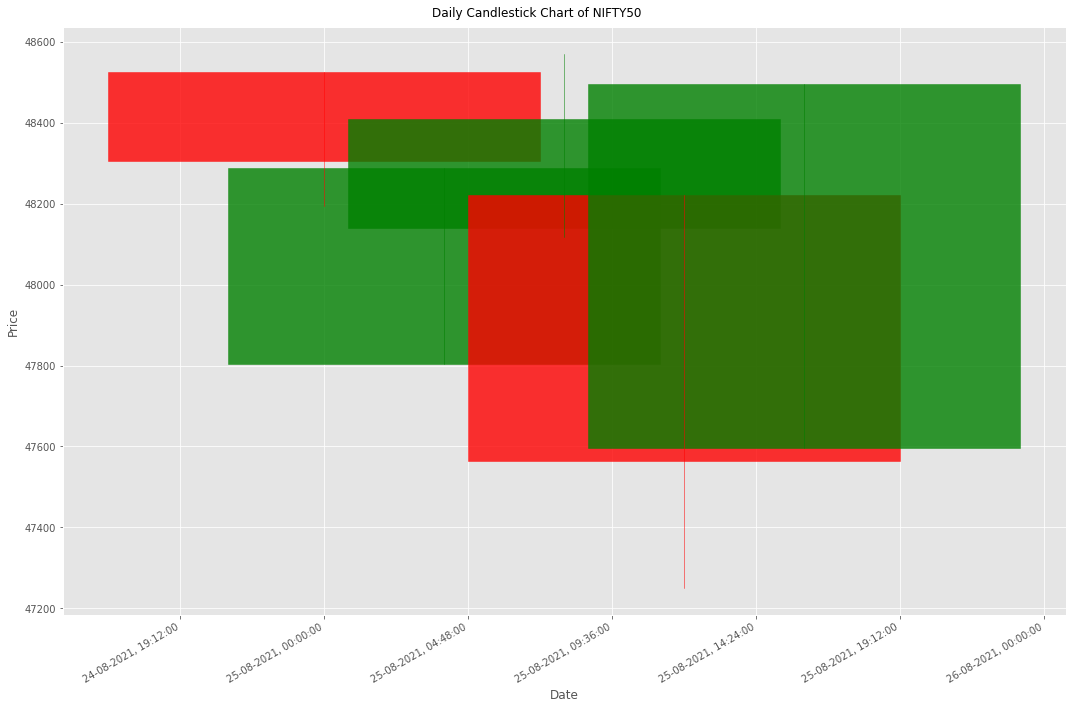

In [87]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpl_dates

plt.style.use('ggplot')

# Extracting Data for plotting
#data = pd.read_csv('candlestick_python_data.csv')
ohlc = data.loc[:, ['Date', 'open', 'high', 'low', 'close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

# Creating Subplots
fig, ax = plt.subplots(figsize=(15,10))

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of NIFTY50')

# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y, %H:%M:%S')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()

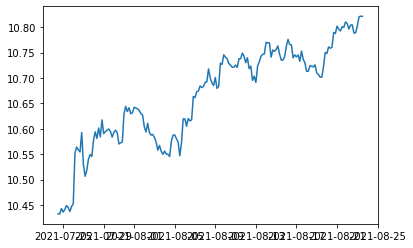

In [32]:
plt.plot(df_4h['log_close'])

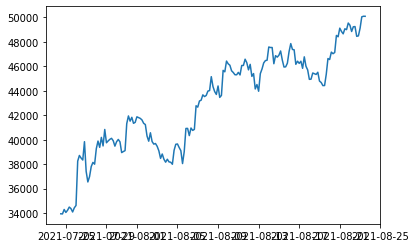

In [33]:
plt.plot(df_4h['close'])

## Gemini 1h data 🕐
... but we need **MORE** DATA ...

https://www.cryptodatadownload.com/data/gemini/

In [71]:
data_gemini = pd.read_csv("../raw_data/gemini_BTCUSD_1hr.csv")

In [72]:
data_gemini

,,,,,,Created on 08-13-2021,https://www.CryptoDataDownload.com
Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
1628812800000,2021-08-13 00:00:00,BTCUSD,44430.99,44598.83,44419.58,44598.83,2.1087433717
1628809200000,2021-08-12 23:00:00,BTCUSD,43979.65,44541.87,43979.65,44430.99,36.2844087
1628805600000,2021-08-12 22:00:00,BTCUSD,44265.95,44323.16,43895.31,43979.65,104.1080794826
1628802000000,2021-08-12 21:00:00,BTCUSD,44468.7,44549.0,44187.4,44265.95,42.8839793875
...,...,...,...,...,...,...,...
1444323600,2015-10-08 17:00:00,BTCUSD,244.25,244.99,244.02,244.99,3.920632003
1444320000,2015-10-08 16:00:00,BTCUSD,244.92,244.92,244.25,244.25,3.89525246
1444316400,2015-10-08 15:00:00,BTCUSD,245.0,245.0,244.92,244.92,3.016925828
1444312800,2015-10-08 14:00:00,BTCUSD,245.0,245.0,244.5,245.0,4.453648931


In [70]:

data_gemini.index
data_gemini.reset_index(inplace=True)
column_names=['Unix Timestamp','Date','Symbol','Open','High','Low','Close','Volume']
data_gemini.columns = column_names
df_gemini = data_gemini.iloc[1:].copy()

In [65]:
#transform to datetime
df_gemini['Date'] = pd.to_datetime(df_gemini['Date'])

#transform numerics into floats
numerics = ['Open','High','Low','Close','Volume']
for k in numerics:
    df_gemini[k] = pd.to_numeric(df_gemini[k])
    
#set date to index 
df_gemini = df_gemini.set_index('Date')

In [66]:
df_gemini = df_gemini.drop(columns=['Unix Timestamp', 'Symbol'])

In [67]:
df_gemini

,Open,High,Low,Close,Volume
Date,,,,,
2021-08-13 00:00:00,44430.99,44598.83,44419.58,44598.83,2.108743
2021-08-12 23:00:00,43979.65,44541.87,43979.65,44430.99,36.284409
2021-08-12 22:00:00,44265.95,44323.16,43895.31,43979.65,104.108079
2021-08-12 21:00:00,44468.70,44549.00,44187.40,44265.95,42.883979
2021-08-12 20:00:00,44407.09,44578.23,44141.73,44468.70,63.500585
...,...,...,...,...,...
2015-10-08 17:00:00,244.25,244.99,244.02,244.99,3.920632
2015-10-08 16:00:00,244.92,244.92,244.25,244.25,3.895252
2015-10-08 15:00:00,245.00,245.00,244.92,244.92,3.016926


In [68]:
df_g_4h = df_gemini.resample("4H").mean()

for x in ['Open', 'High', 'Low', 'Close']:
    df_g_4h[f'log_{x}'] = df_g_4h[x].apply(lambda x: np.log(x))

In [69]:
print("again after some preprocessing we can yield:")
df_g_4h

again after some preprocessing we can yield:


,Open,High,Low,Close,Volume,log_Open,log_High,log_Low,log_Close
Date,,,,,,,,,
2015-10-08 12:00:00,163.333333,245.0000,163.1400,244.973333,2.692410,5.095793,5.501258,5.094609,5.501149
2015-10-08 16:00:00,244.540000,244.7250,244.0675,244.310000,3.259453,5.499379,5.500135,5.497445,5.498438
2015-10-08 20:00:00,243.975000,243.9875,243.7675,243.962500,2.659915,5.497066,5.497117,5.496215,5.497015
2015-10-09 00:00:00,243.687500,243.6875,243.6000,243.600000,0.750000,5.495887,5.495887,5.495528,5.495528
2015-10-09 04:00:00,243.600000,243.6000,243.6000,243.600000,0.000000,5.495528,5.495528,5.495528,5.495528
...,...,...,...,...,...,...,...,...,...
2021-08-12 08:00:00,45323.657500,45529.0675,44998.1425,45190.977500,69.830994,10.721584,10.726106,10.714376,10.718653
2021-08-12 12:00:00,44491.795000,44643.4775,44186.6725,44353.090000,114.602881,10.703060,10.706463,10.696178,10.699938
2021-08-12 16:00:00,44198.082500,44414.5750,44034.7175,44248.827500,84.168365,10.696437,10.701323,10.692734,10.697584


# Timeseries analysis - SARIMAX

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pma
from statsmodels.tsa.statespace.sarimax import SARIMAX

ModuleNotFoundError: No module named 'statsmodels'

### Remove missing values

In [41]:
daily_clean.isnull().sum()

prices           0
market_caps      1
total_volumes    0
log_price        0
dtype: int64

In [24]:
daily_clean.loc[daily_clean.market_caps.isnull() == True]

,prices,market_caps,total_volumes,log_price
Date,,,,
2017-04-02,1098.1,NaN,8.023151e+07,7.001337


In [25]:
daily_clean.dropna()

,prices,market_caps,total_volumes,log_price
Date,,,,
2013-04-28,135.3,1.500518e+09,0.000000e+00,4.907495
2013-04-29,142.0,1.575032e+09,0.000000e+00,4.955827
2013-04-30,135.3,1.501657e+09,0.000000e+00,4.907495
2013-05-01,117.0,1.298952e+09,0.000000e+00,4.762174
2013-05-02,103.4,1.148668e+09,0.000000e+00,4.638605
...,...,...,...,...
2021-08-16,47025.0,8.828882e+11,3.286385e+10,10.758435
2021-08-17,46031.8,8.663913e+11,3.422161e+10,10.737088
2021-08-18,44534.5,8.367771e+11,3.448812e+10,10.704019


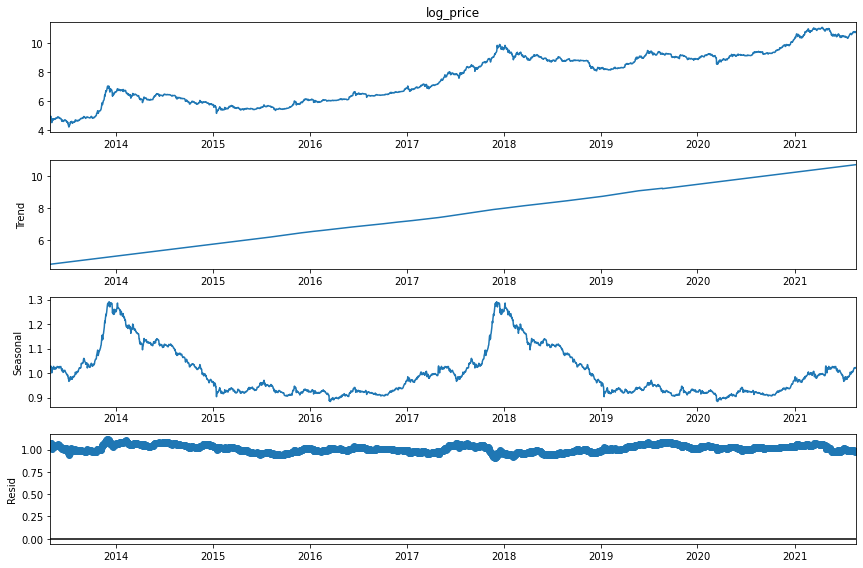

In [26]:
df_deco = seasonal_decompose(daily_clean.log_price, model = 'multiplicative',extrapolate_trend='freq', period=1460) # 1460=bitcoin halving
plt.rcParams.update({'figure.figsize': (12,8)})
df_deco.plot();

In [27]:
#df_deco = seasonal_decompose(daily_clean.prices, model = 'additive',extrapolate_trend='freq', period=1460)
#df_deco.plot();

In [42]:
from statsmodels.tsa.stattools import adfuller
print('p-value: ', adfuller(daily_clean.log_price)[1])

ModuleNotFoundError: No module named 'statsmodels'

In [43]:
# First diff
print('first diff p-value: ', adfuller(daily_clean.log_price.diff(1).fillna(0))[1])
# Second order diff
print('secon diff p-value: ', adfuller(daily_clean.log_price.diff(1).diff(1).fillna(0))[1])

NameError: name 'adfuller' is not defined

> First diff is clearly enough

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original Series
fig, axes = plt.subplots(3, 2, figsize=(13,10))
axes[0, 0].plot(daily_clean.log_price); axes[0, 0].set_title('Original Series')
plot_acf(daily_clean.log_price, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(daily_clean.log_price.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(daily_clean.log_price.diff().dropna(), ax=axes[1, 1])


# 2nd Differencing
axes[2, 0].plot(daily_clean.log_price.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(daily_clean.log_price.diff().diff().dropna(), ax=axes[2, 1])

plt.show()


ModuleNotFoundError: No module named 'statsmodels'

In [45]:
y_diff = daily_clean.log_price.diff()

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig,axes = plt.subplots(1,2,figsize=(13,5))
plot_acf(y_diff.dropna(),ax=axes[0])
plot_pacf(y_diff.dropna(), c='r', ax=axes[1]);


ModuleNotFoundError: No module named 'statsmodels'

## Dataframe

**NEXT UP** 
- Concatenate dataframes and transform them into X and y
- Add features i.e. Fear&Greed Index, WhaleAlerts, sentiment analysis
<br/><br/>
    - 🧗‍♂️ Trend Indicator: **EMA, MA**
    - 🤸‍ Momentum Indicator: **STOCH RSI**
    - 🎢 Volatility Indicator: **STANDARD DEVIATION, BOLLINGER BANDS**
    - 🍺 Volume Indicator: **VOLUME RATE OF CHANGE**
        - 🧠 We can calculate these ourselves from the datasets 🧠
<br/><br/>
- Additional cryptos?

### EMA
> **Introduction:**
Exponential Moving Averages are used a lot by market analysts to look at the average price of a commodity over a particular period. This Indicator is used to calculate the mean or average of a particular set of data. Whenever new data is added, the oldest data piece is removed from the list and the newest dada piece is added. A moving average can help an analyst filter noise and create a smooth curve from an otherwise noisy curve. It is important to note moving averages lag because they are based on historical data, not current price.

  <br> The most commonly used Moving Averages (MAs) are the simple and exponential moving average. For exponential moving average, the simple moving average needs to be calculated. The concept of weight is introduced in exponential moving average. Newer data points are given greater importance or a greater weight and thus have more effect on the calculation of the moving average
  

Formula: 
![Exponential Moving Average Equation Source: Investopedia](https://cdn-images-1.medium.com/max/800/1*IF5pSc_Zp_vlKI3paux4-Q.png)



**EMA Resources**


- [calculate with pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html)
- [investopedia](https://www.investopedia.com/terms/g/guppy-multiple-moving-average.asp)
- normally the 12&26 day ema are used for shortterm trading 50&200 for longterm



**RSI Resources:**

- [calculate with python](https://handsoffinvesting.com/calculate-and-analyze-rsi-using-python/)

- [calculate with python2](https://www.learnpythonwithrune.org/pandas-calculate-the-relative-strength-index-rsi-on-a-stock/)

**Bollinger Bands**
- [calculate with python](https://medium.com/codex/how-to-calculate-bollinger-bands-of-a-stock-with-python-f9f7d1184fc3)

In [33]:
df_g_4h['ema12'] = df_g_4h.Close.ewm(span=12).mean()
df_g_4h['ema26'] = df_g_4h.Close.ewm(span=26).mean()

In [34]:
#df_g_4h['ma200'] = df_g_4h.Close.rolling(window=200).mean()
#df_g_4h['ma50'] = df_g_4h.Close.rolling(window=50).mean()

In [35]:
df_g_4h.tail()

,Open,High,Low,Close,Volume,log_Open,log_High,log_Low,log_Close,ema12,ema26
Date,,,,,,,,,,,
2021-08-12 08:00:00,45323.6575,45529.0675,44998.1425,45190.9775,69.830994,10.721584,10.726106,10.714376,10.718653,45660.178241,45039.031860
2021-08-12 12:00:00,44491.7950,44643.4775,44186.6725,44353.0900,114.602881,10.703060,10.706463,10.696178,10.699938,45459.087743,44988.221352
2021-08-12 16:00:00,44198.0825,44414.5750,44034.7175,44248.8275,84.168365,10.696437,10.701323,10.692734,10.697584,45272.893859,44933.451437
2021-08-12 20:00:00,44280.3475,44498.0650,44051.0225,44286.3225,61.694263,10.698296,10.703201,10.693104,10.698431,45121.113650,44885.515960
2021-08-13 00:00:00,44430.9900,44598.8300,44419.5800,44598.8300,2.108743,10.701692,10.705463,10.701436,10.705463,45040.762319,44864.279963


In [36]:
#plt.plot(df_g_4h[["Close", "ma200"]].iloc[-1000:])
#plt.plot(df_g_4h[["Close", "ma50"]].iloc[-1000:])

### Preview: EMAs

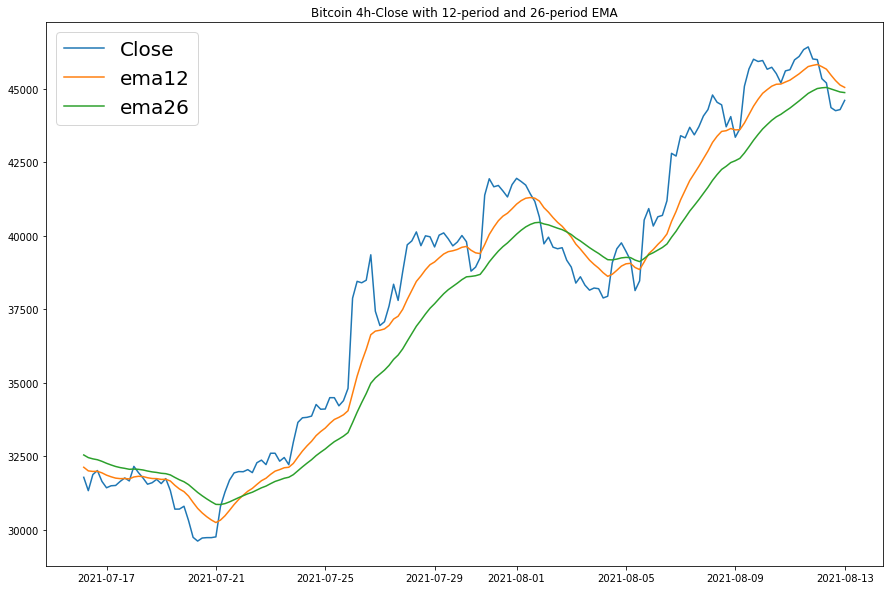

In [37]:
fig = plt.figure(figsize=(15,10))
plt.plot(df_g_4h[["Close", "ema12", "ema26"]].iloc[-168:], label=["Close", "ema12", "ema26"])
#plt.xticks([])
plt.title("Bitcoin 4h-Close with 12-period and 26-period EMA")
plt.legend(prop={'size': 20})
plt.show()

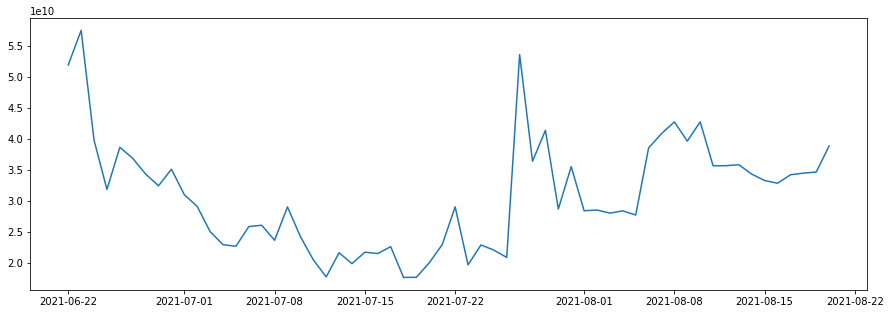

In [38]:
plt.figure(figsize=(15,5))
plt.plot(daily_clean.total_volumes[-60:])

In [39]:
#df_g_4h['vol_roc'] = df_g_4h.Volume.pct_change()

In [40]:
# #plt.plot(df_g_4h.vol_roc[-50:])
# #plt.plot(df_g_4h.vol_roc[-50:])

# fig, ax1 = plt.subplots()

# color = 'tab:red'
# ax1.set_xlabel('time (4h)')
# ax1.set_ylabel('rate of change', color=color)
# ax1.plot(df_g_4h.vol_roc[-50:], color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('price', color=color)  # we already handled the x-label with ax1
# ax2.plot(df_g_4h.Close[-50:], color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

# Deep Learning - LSTM

### https://www.analyticsvidhya.com/blog/2021/05/bitcoin-price-prediction-using-recurrent-neural-networks-and-lstm/

In [41]:
df_g_4h

,Open,High,Low,Close,Volume,log_Open,log_High,log_Low,log_Close,ema12,ema26
Date,,,,,,,,,,,
2015-10-08 12:00:00,163.333333,245.0000,163.1400,244.973333,2.692410,5.095793,5.501258,5.094609,5.501149,244.973333,244.973333
2015-10-08 16:00:00,244.540000,244.7250,244.0675,244.310000,3.259453,5.499379,5.500135,5.497445,5.498438,244.614028,244.628910
2015-10-08 20:00:00,243.975000,243.9875,243.7675,243.962500,2.659915,5.497066,5.497117,5.496215,5.497015,244.359736,244.389476
2015-10-09 00:00:00,243.687500,243.6875,243.6000,243.600000,0.750000,5.495887,5.495887,5.495528,5.495528,244.119917,244.168773
2015-10-09 04:00:00,243.600000,243.6000,243.6000,243.600000,0.000000,5.495528,5.495528,5.495528,5.495528,243.978658,244.036872
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-12 08:00:00,45323.657500,45529.0675,44998.1425,45190.977500,69.830994,10.721584,10.726106,10.714376,10.718653,45660.178241,45039.031860
2021-08-12 12:00:00,44491.795000,44643.4775,44186.6725,44353.090000,114.602881,10.703060,10.706463,10.696178,10.699938,45459.087743,44988.221352
2021-08-12 16:00:00,44198.082500,44414.5750,44034.7175,44248.827500,84.168365,10.696437,10.701323,10.692734,10.697584,45272.893859,44933.451437


In [42]:
df_g_4h = df_g_4h.iloc[:-1].drop(columns=[])

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training_data = scaler.fit_transform(df_g_4h)
training_data

array([[0.00000000e+00, 2.17480120e-05, 0.00000000e+00, ...,
        1.00813399e-03, 1.73470986e-05, 1.68464481e-05],
       [1.26826414e-03, 1.74760811e-05, 1.26834399e-03, ...,
        5.21903064e-04, 1.16099649e-05, 1.12821177e-05],
       [1.25944012e-03, 6.01953904e-06, 1.26364221e-03, ...,
        2.66654370e-04, 7.54962128e-06, 7.41392760e-06],
       ...,
       [6.92310136e-01, 6.89720763e-01, 6.89963027e-01, ...,
        9.33281007e-01, 7.21963938e-01, 7.22866818e-01],
       [6.87723012e-01, 6.86164924e-01, 6.87581497e-01, ...,
        9.32858964e-01, 7.18990928e-01, 7.21981982e-01],
       [6.89007805e-01, 6.87461883e-01, 6.87837039e-01, ...,
        9.33010854e-01, 7.16567410e-01, 7.21207560e-01]])

In [44]:
training_data.shape[0]

12813

In [45]:
X_train = [] 
Y_train = []
training_data.shape[0]
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])
    
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape

(12753, 60, 11)

In [46]:
Y_train.shape

(12753,)

In [47]:
from tensorflow.keras import models, layers
from tensorflow.keras.metrics import Precision

model = models.Sequential()
model.add(layers.LSTM(20, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'relu'))

model.compile(loss='mse',
             optimizer='rmsprop',
             metrics=['mae'])

In [48]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=5, restore_best_weights = True)

history = model.fit(X_train,Y_train, batch_size=16, epochs=15, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/15
638/638 [==============================] - 18s 26ms/step - loss: 2.3940e-04 - mae: 0.0098 - val_loss: 0.0013 - val_mae: 0.0261
Epoch 2/15
638/638 [==============================] - 16s 25ms/step - loss: 5.2143e-05 - mae: 0.0054 - val_loss: 4.8205e-04 - val_mae: 0.0180
Epoch 3/15
638/638 [==============================] - 16s 24ms/step - loss: 3.1761e-05 - mae: 0.0042 - val_loss: 0.0015 - val_mae: 0.0263
Epoch 4/15
638/638 [==============================] - 16s 25ms/step - loss: 2.2631e-05 - mae: 0.0035 - val_loss: 0.0027 - val_mae: 0.0357
Epoch 5/15
638/638 [==============================] - 17s 26ms/step - loss: 1.7741e-05 - mae: 0.0031 - val_loss: 0.0023 - val_mae: 0.0301
Epoch 6/15
638/638 [==============================] - 16s 25ms/step - loss: 1.4644e-05 - mae: 0.0029 - val_loss: 0.0031 - val_mae: 0.0407
Epoch 7/15
638/638 [==============================] - 17s 26ms/step - loss: 1.2818e-05 - mae: 0.0027 - val_loss: 0.0019 - val_mae: 0.0308


In [ ]:
#another test with yahoo data

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
#Yahoo Finance Data
data = pd.read_csv("data/BTC-USD.csv")
data["Date"] = pd.to_datetime(data["Date"], format='%Y-%m-%d')
data = data.set_index('Date').drop(columns='Adj Close')
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0


In [234]:
data.isnull().sum()

Open      4
High      4
Low       4
Close     4
Volume    4
dtype: int64

In [236]:
data.dropna(inplace=True)

In [237]:
data.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [215]:
temp = ['Open', 'High', 'Low', 'Close']
for x in temp:
    data[f'log_{x}'] = data[x].apply(lambda x: np.log(x))

In [238]:
prediction_days = 30
df_train = data[:len(data)-prediction_days]
df_test = data[len(data)-prediction_days:]

In [242]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_train)
df_scaled

array([[4.56166296e-03, 3.96655200e-03, 4.52810327e-03, 4.40946635e-03,
        4.31449241e-05],
       [4.41952444e-03, 3.79155143e-03, 3.89432496e-03, 3.89002176e-03,
        8.14009147e-05],
       [3.90241925e-03, 3.34260510e-03, 3.43376463e-03, 3.42189943e-03,
        9.11925723e-05],
       ...,
       [4.84023828e-01, 4.76315631e-01, 4.70513259e-01, 4.67889128e-01,
        6.59397624e-02],
       [4.67574709e-01, 5.03324165e-01, 4.73176626e-01, 5.04262327e-01,
        8.03423386e-02],
       [5.04555042e-01, 5.00603020e-01, 5.08947198e-01, 5.07458710e-01,
        5.57020830e-02]])

In [244]:
X_train = df_scaled[0:len(df_scaled)-1]
y_train = df_scaled[1:len(df_scaled)]

In [246]:
X_train = np.reshape(X_train, (len(X_train), 5, 1))

In [247]:
X_train.shape

(2496, 5, 1)

In [248]:
y_train.shape

(2496, 5)

In [253]:
from tensorflow.keras import models,layers

model = models.Sequential()
model.add(layers.LSTM(20, activation = 'tanh'))
model.add(layers.Dense(1, activation = 'relu'))

model.compile(loss='mse',
             optimizer='rmsprop',
             metrics=['mae'])

In [254]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=5, restore_best_weights = True)

history = model.fit(X_train,y_train, batch_size=16, epochs=100, verbose=1, validation_split=0.1, callbacks=[es])

Epoch 1/100
141/141 [==============================] - 2s 9ms/step - loss: 0.0015 - mae: 0.0268 - val_loss: 0.0502 - val_mae: 0.1136
Epoch 2/100
141/141 [==============================] - 1s 6ms/step - loss: 7.4976e-04 - mae: 0.0157 - val_loss: 0.0473 - val_mae: 0.1183
Epoch 3/100
141/141 [==============================] - 1s 5ms/step - loss: 7.4779e-04 - mae: 0.0156 - val_loss: 0.0428 - val_mae: 0.1488
Epoch 4/100
141/141 [==============================] - 1s 5ms/step - loss: 7.4418e-04 - mae: 0.0155 - val_loss: 0.0428 - val_mae: 0.1503
Epoch 5/100
141/141 [==============================] - 1s 6ms/step - loss: 7.4228e-04 - mae: 0.0155 - val_loss: 0.0429 - val_mae: 0.1558
Epoch 6/100
141/141 [==============================] - 1s 5ms/step - loss: 7.4271e-04 - mae: 0.0155 - val_loss: 0.0437 - val_mae: 0.1669
Epoch 7/100
141/141 [==============================] - 1s 6ms/step - loss: 7.4324e-04 - mae: 0.0155 - val_loss: 0.0431 - val_mae: 0.1583
Epoch 8/100
141/141 [========================

In [57]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [58]:
inputs = scaler.transform(df_test)

NameError: name 'scaler' is not defined

In [59]:
X_test = inputs[0:len(inputs)-1]
y_test = inputs[1:len(inputs)]

NameError: name 'inputs' is not defined

In [60]:
X_test = np.reshape(X_test, (len(X_test), 5, 1))

NameError: name 'X_test' is not defined

In [61]:
y_pred = model.predict(X_test)

NameError: name 'model' is not defined

In [268]:
scaler.scale_
scale = 1/1.57861029e-05

In [269]:
y_test = y_test*scale
y_pred = y_pred*scale

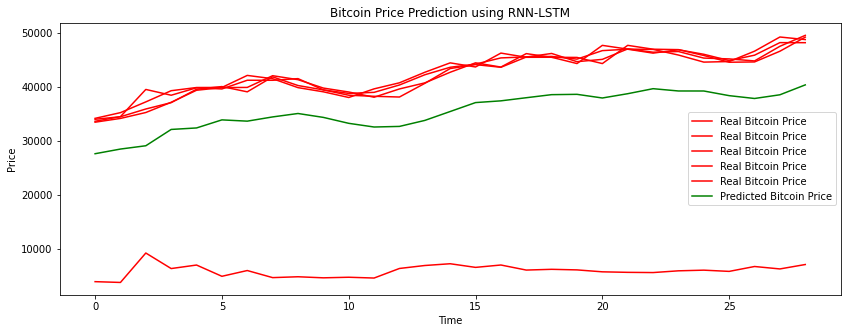

In [272]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Moon soon? 🚀🌛👩‍🚀

![bitcoin_gif](https://i.redd.it/o4kiivegv9hy.gif)

# To Slides

In [ ]:
!jupyter nbconvert projectweek_draft.ipynb --to slides --post serve \
--no-prompt \
--TagRemovePreprocessor.remove_input_tags=remove_input \
--TagRemovePreprocessor.remove_all_outputs_tags=remove_output

[NbConvertApp] Converting notebook projectweek_draft.ipynb to slides
[NbConvertApp] Writing 811292 bytes to projectweek_draft.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/projectweek_draft.slides.html
Use Control-C to stop this server
